# Homework 11 - Data Competition

**Classification of Email (Spam or not)**

By: Akhil Reddy Annreddy, Divya Reddy Manku

Contributions: **Divya Reddy Manku** - Data Preparation, Data Preprocessing, Documentation____
               **Akhil Reddy Annreddy** - Predictive Modelling, Documentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

### 1. Data Preparation

In [2]:
# Read the train dataset and check for any inconsistencies

train_email_data = pd.read_csv("train_data.csv")

#Load test data
test_email_data = pd.read_csv('test_data.csv')

train_email_data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.0,0.0,0.29,0.0,0.29,0.0,0.0,0.00,0.29,0.00,...,0.0,0.156,0.031,0.376,0.000,0.125,3.338,157,611,0
1,0.0,0.0,2.12,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,2.647,16,45,0
2,0.0,0.0,0.36,0.0,0.73,0.0,0.0,0.00,0.00,0.73,...,0.0,0.000,0.000,0.000,0.000,0.000,2.130,12,228,1
3,0.0,0.0,1.31,0.0,2.63,0.0,0.0,0.65,0.00,0.00,...,0.0,0.198,0.000,0.198,0.099,0.000,2.195,12,101,1
4,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,...,0.0,0.000,0.000,0.000,0.000,0.000,2.466,13,37,0


In [3]:
train_email_data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,3220.0,0.099854,0.285808,0.0,0.000,0.000,0.00000,4.340
word_freq_address,3220.0,0.219792,1.329902,0.0,0.000,0.000,0.00000,14.280
word_freq_all,3220.0,0.284391,0.504691,0.0,0.000,0.000,0.43000,4.540
word_freq_3d,3220.0,0.041627,1.010729,0.0,0.000,0.000,0.00000,40.130
word_freq_our,3220.0,0.306783,0.654040,0.0,0.000,0.000,0.37000,10.000
word_freq_over,3220.0,0.100839,0.289473,0.0,0.000,0.000,0.00000,5.880
word_freq_remove,3220.0,0.112981,0.402128,0.0,0.000,0.000,0.00000,7.270
word_freq_internet,3220.0,0.108127,0.414894,0.0,0.000,0.000,0.00000,11.110
word_freq_order,3220.0,0.087357,0.255191,0.0,0.000,0.000,0.00000,2.590
word_freq_mail,3220.0,0.239550,0.661345,0.0,0.000,0.000,0.15000,18.180


From above analysis we can observe that "capital_run_length_total", "capital_run_length_longest" & "capital_run_length_average" have larger scales compared to other variables. So their might be a chance of skewness in the dataset. Correlation matrix between the variables can confirm if the skewness in the variables are valid or not.

In [4]:
# Check if there are any missing data

train_email_data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

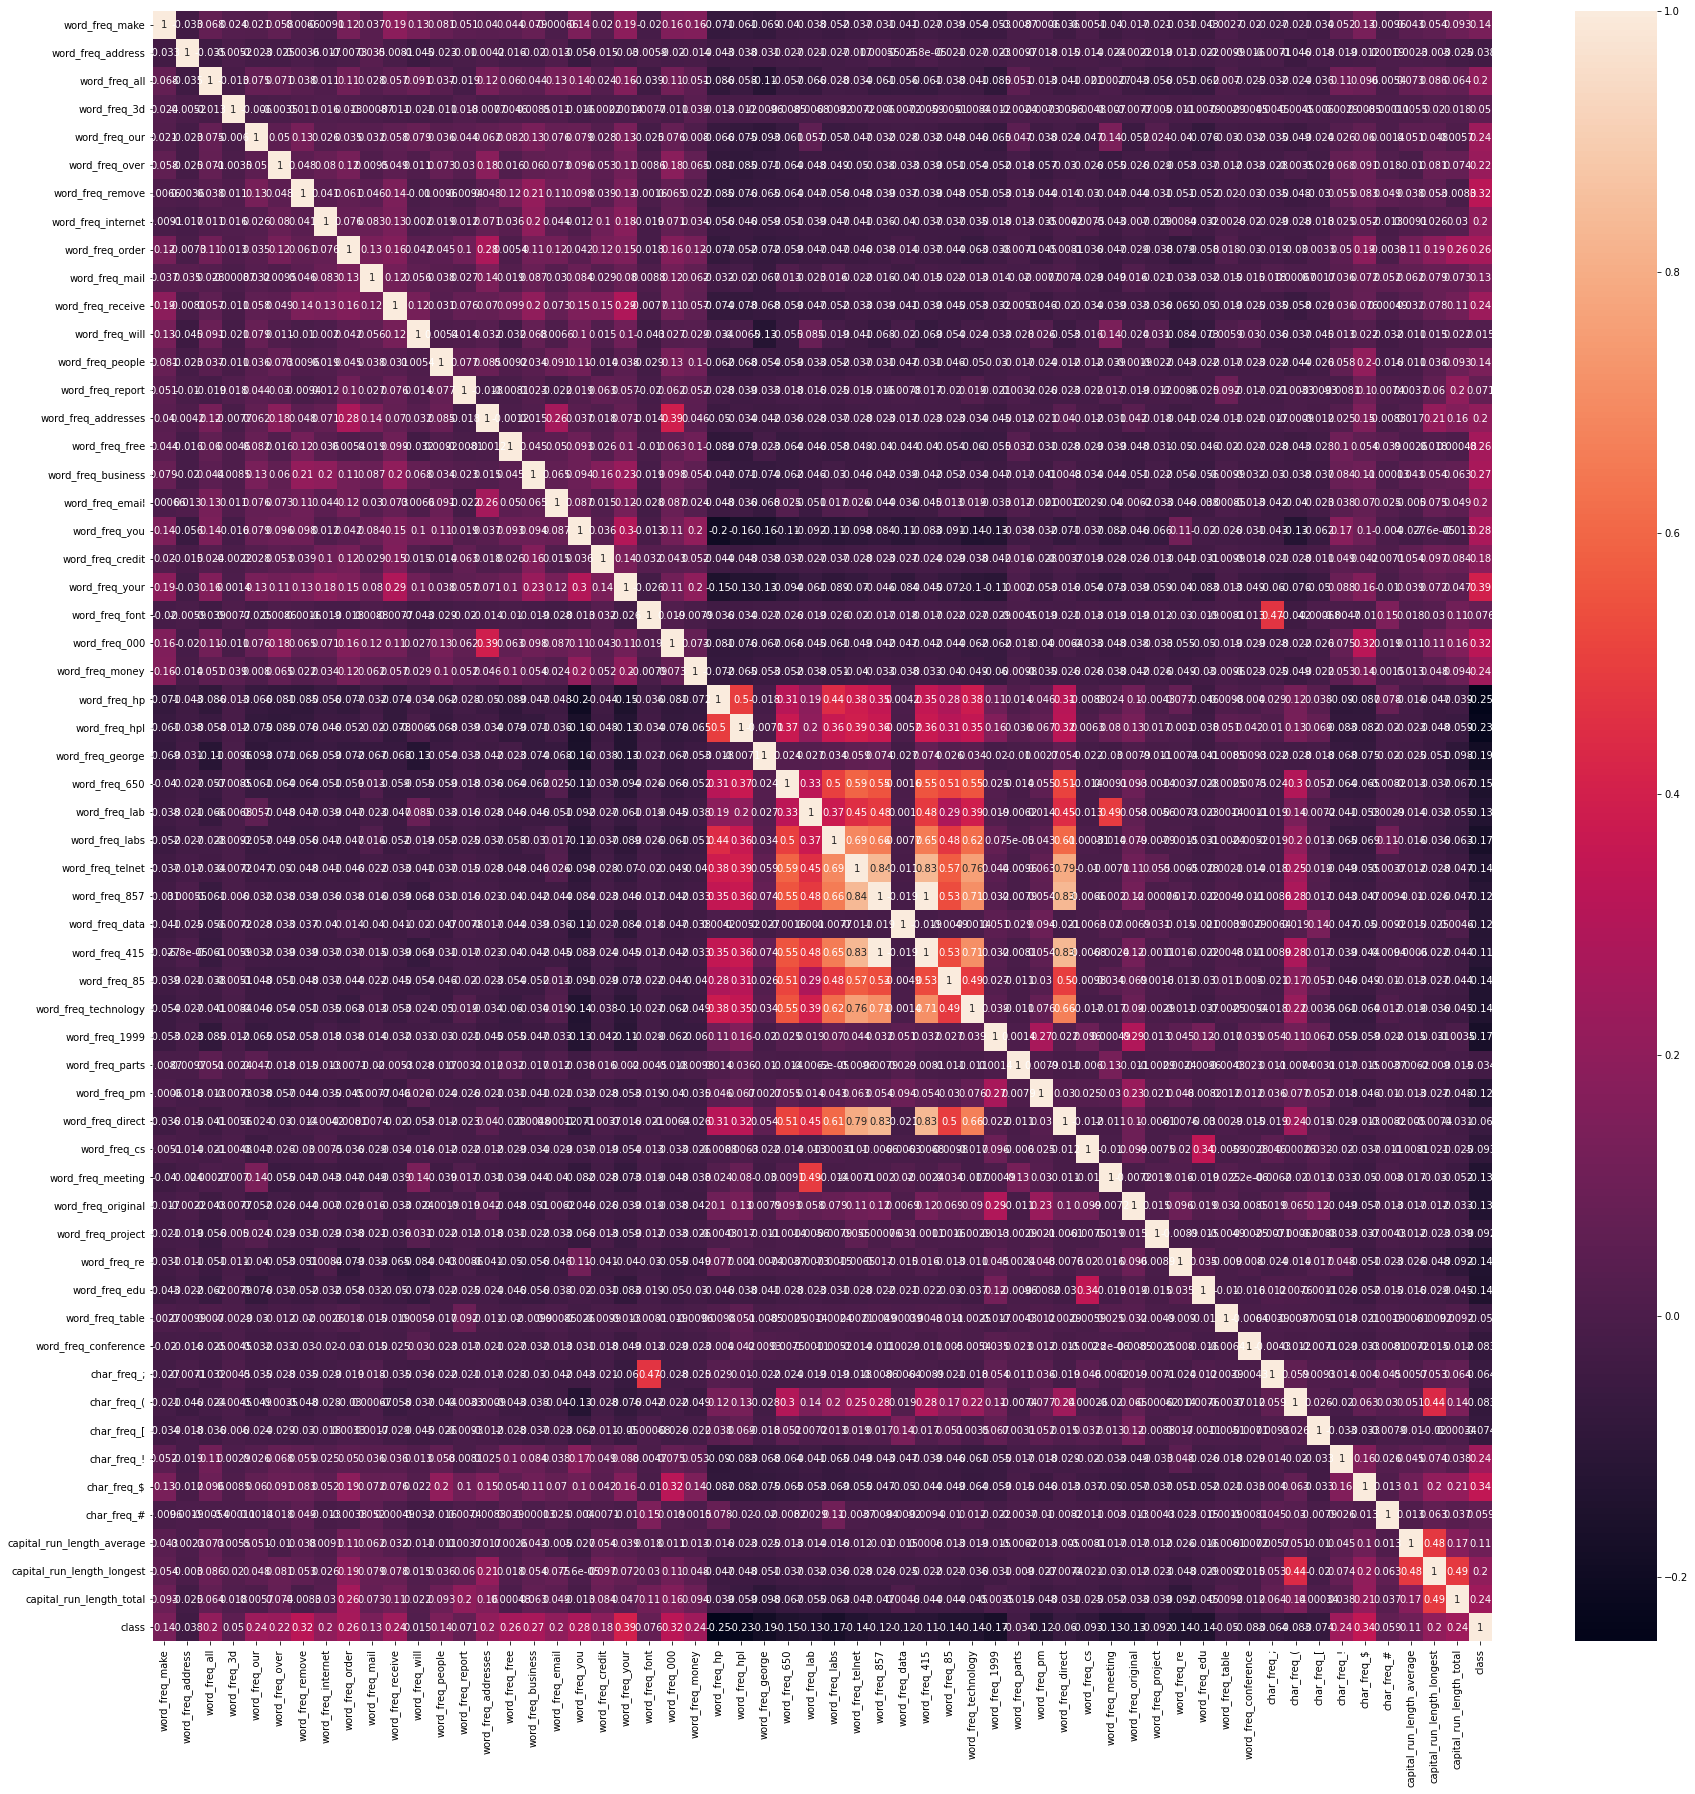

In [5]:
import seaborn as sns

# Plot correlation between input variables and prediction variable
plt.figure(figsize=(30,30))
sns.heatmap(train_email_data.corr(),annot = True)
plt.show()

In [6]:
#Display correlation of other varibles with 'class' variable(to be predicted)
train_email_data.corr()['class'].sort_values(ascending=False)

class                         1.000000
word_freq_your                0.394759
char_freq_$                   0.342231
word_freq_remove              0.324303
word_freq_000                 0.324170
word_freq_you                 0.276466
word_freq_business            0.269768
word_freq_order               0.263688
word_freq_free                0.262890
capital_run_length_total      0.242894
word_freq_money               0.242301
char_freq_!                   0.241048
word_freq_our                 0.237195
word_freq_receive             0.236674
word_freq_over                0.224339
word_freq_all                 0.202026
word_freq_addresses           0.201377
capital_run_length_longest    0.199692
word_freq_email               0.199358
word_freq_internet            0.198624
word_freq_credit              0.184658
word_freq_people              0.136222
word_freq_make                0.135520
word_freq_mail                0.134761
capital_run_length_average    0.105207
word_freq_font           

In [7]:
#Taking absolute of correlation coefficient
correlation = pd.DataFrame(abs(train_email_data.corr()['class'].sort_index()))

#Reset Index and renaming to feature
correlation.reset_index().rename(columns={'index':'features'})

,features,class
0,capital_run_length_average,0.105207
1,capital_run_length_longest,0.199692
2,capital_run_length_total,0.242894
3,char_freq_!,0.241048
4,char_freq_#,0.058654
5,char_freq_$,0.342231
6,char_freq_(,0.083305
7,char_freq_;,0.064066
8,char_freq_[,0.073673
9,class,1.000000


From the above correlation table, we could say that not all variables are highly correlated with prediction variable(class). There might be a chance that data is highly skewed as Pearson's Correlation results in low correlation coefficients.

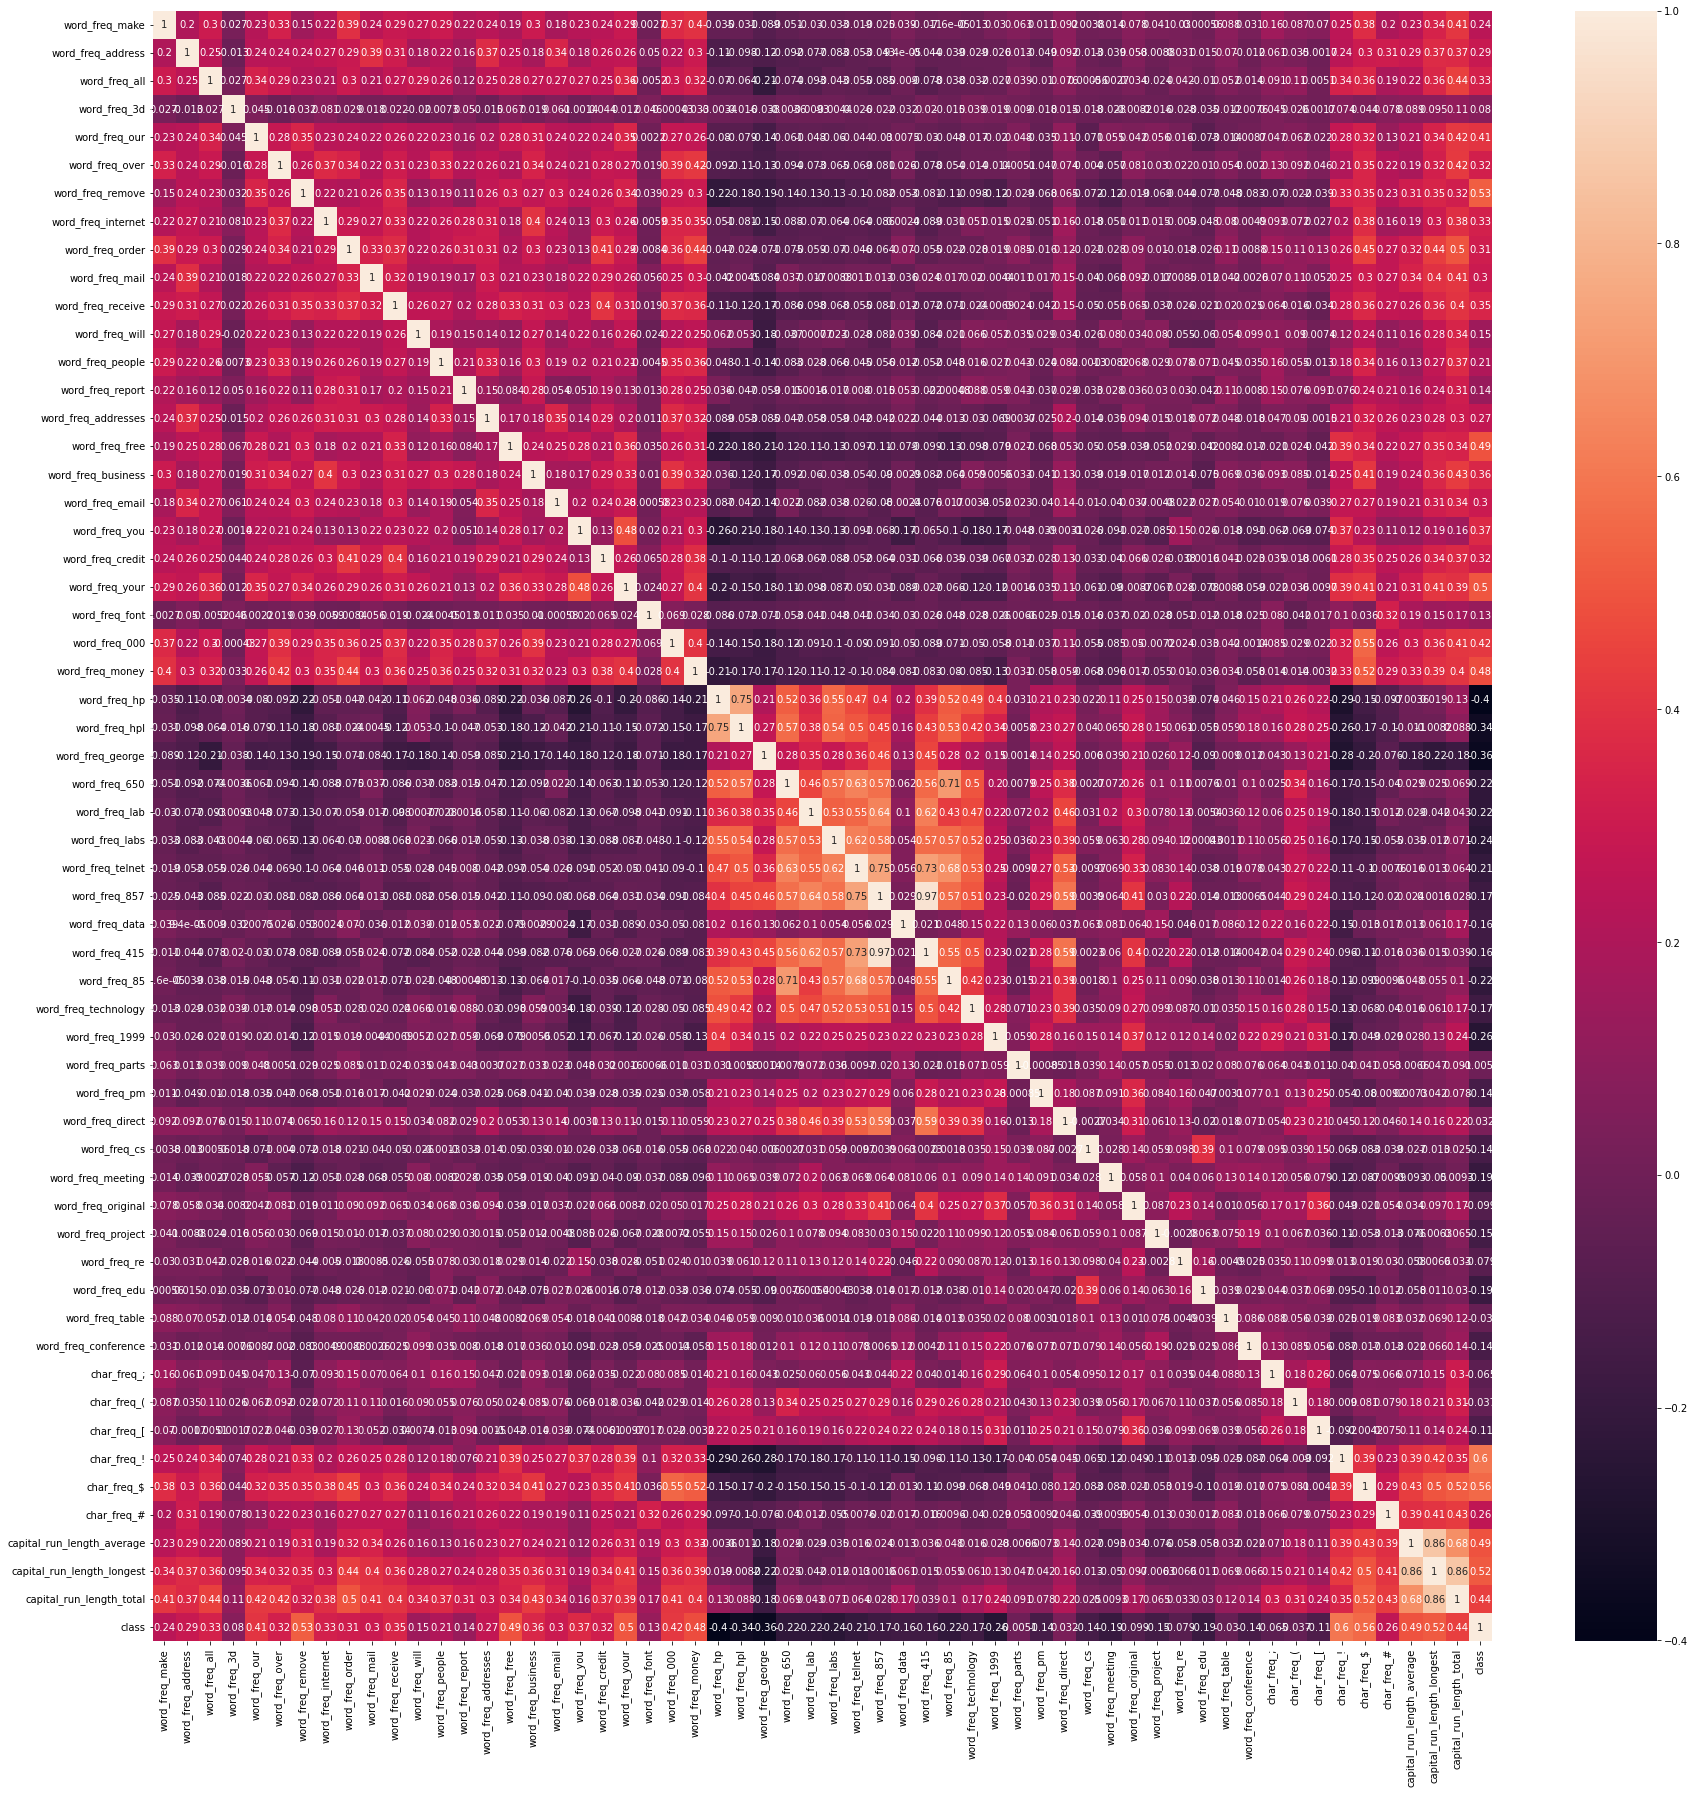

In [8]:
#Using Spearman's Correlation method to check corr coefficients
plt.figure(figsize=(30,30))
sns.heatmap(train_email_data.corr(method = 'spearman'),annot = True)
plt.show()

Using Spearman's Correlation, we observed that the correlation coeff are mostly below 0.5 (which indicates less correlation between variables). With this we can confirm that the data is skewed as the correlation between the skewed variables are observed to be huge using 2 correlation methods.

In [9]:
#Check for skewness

train_email_data.skew().sort_values(ascending=False)

word_freq_3d                  34.033748
capital_run_length_longest    30.404952
char_freq_#                   27.701534
word_freq_parts               25.589035
capital_run_length_average    24.639855
char_freq_[                   22.396566
char_freq_!                   21.707014
word_freq_conference          19.329513
word_freq_table               18.790654
word_freq_project             18.555707
word_freq_85                  17.852519
word_freq_credit              15.309826
char_freq_(                   14.723590
word_freq_data                13.833752
word_freq_cs                  13.360940
char_freq_;                   13.315293
word_freq_money               12.541727
word_freq_lab                 12.069531
word_freq_pm                  10.943323
word_freq_857                 10.499405
word_freq_meeting             10.480855
word_freq_415                 10.421930
word_freq_edu                 10.312747
word_freq_internet            10.229145
word_freq_free                10.215561


c:\users\akhil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

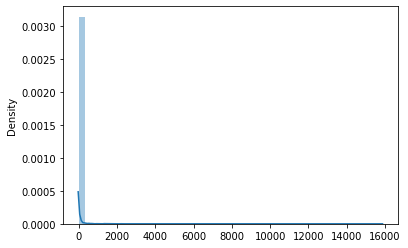

In [10]:
sns.distplot(train_email_data)

From above graph we could see that the variables of the dataset are highly skewed, so using data transformation to reduce skewness in data

### 2. Data Preprocessing

In [11]:
from sklearn.preprocessing import PowerTransformer

#Power Transformer makes skewed data transform to almost Normal Distribution.

pt = PowerTransformer(method='yeo-johnson', #Using yeo-johnson method as the variables have zero values and "Box-Cox" doesn't support zero values
                      standardize=True)

X_train = train_email_data.drop('class',axis=1)
y_train = train_email_data['class']


X_test = test_email_data.drop('class',axis =1)

y_test = test_email_data['class']


X_train_transformed_sca = pd.DataFrame(pt.fit_transform(X_train), columns= X_train.columns)

X_test_transformed_sca = pd.DataFrame(pt.fit_transform(X_test), columns= X_test.columns)


In [12]:
#Skewness check after applying transform

X_train_transformed_sca.skew().sort_values(ascending=False)

word_freq_3d                  9.885724
word_freq_table               8.385779
word_freq_parts               7.065626
word_freq_font                6.239505
word_freq_cs                  5.485497
word_freq_conference          4.341039
word_freq_857                 4.338557
word_freq_415                 4.240290
word_freq_telnet              3.565729
word_freq_addresses           3.487421
word_freq_project             3.413641
word_freq_meeting             3.340506
word_freq_report              3.193939
word_freq_pm                  3.116782
word_freq_original            3.062131
word_freq_lab                 3.047288
word_freq_credit              2.900485
word_freq_data                2.882123
word_freq_direct              2.691647
word_freq_650                 2.656999
word_freq_labs                2.602162
word_freq_85                  2.559639
word_freq_edu                 2.553156
char_freq_[                   2.480363
word_freq_technology          2.219329
char_freq_#              

We could observe from the above table that skewness in variables has decreased a lot after applying Power Transform. This transformed dataset can be used for ML models.

### Correcting Imbalance

In [13]:
print(y_train.value_counts())

0    1951
1    1269
Name: class, dtype: int64


We could see that there is imbalance in training dataset of the prediction variable. Using SMOTETomek to resample the training dataset. As test dataset is used as the real world scenario replication(to test the model performance), shouldn't resample it.

In [14]:
#Resampling using SMOTETomek (SMOTETomek is a combination of under-sampling and over-sampling methods)
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_train_transformed_sca, y_train = smt.fit_resample(X_train_transformed_sca, y_train)

In [15]:
print(y_train.value_counts())

0    1940
1    1940
Name: class, dtype: int64


In [16]:
# Define a function to plot confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')
    plt.plot()

# 3. Predictive Modelling

## Using Random Forests Classifier

I have tested the performance of multiple ML models and as the data has effect of outliers, Random Forest Classifier produced better results compared to all as this method is robust to outliers.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Define a RF classifier with customer parameters
rf = RandomForestClassifier(n_estimators=100,max_features=20,random_state=123)
#Fitting RF classifier
rf.fit(X_train_transformed_sca,y_train)

RandomForestClassifier(max_features=20, random_state=123)

In [18]:
#Predicting the output variable
pred_rf = rf.predict(X_test_transformed_sca)

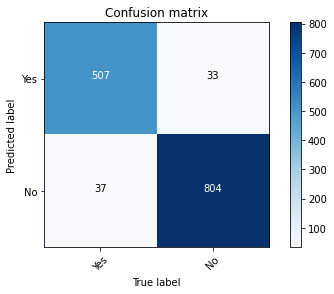

In [19]:
#Print confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(pred_rf,y_test,labels=[1,0]),classes=['Yes','No'])

In [20]:
#Analyze the classification report
print(metrics.classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       837
           1       0.94      0.93      0.94       544

    accuracy                           0.95      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381



In [21]:
print("Accuracy Score on test dataset is: ",metrics.accuracy_score(y_test,pred_rf)*100)
print("AUC Score: ",metrics.roc_auc_score(y_test,pred_rf)*100)

Accuracy Score on test dataset is:  94.93120926864592
AUC Score:  94.6279385410078


**Random Forest Classifier yields AUC score of 94.6.**

Need to tune hyper-parameters for Random Forests and check if there is a model with better performance.

Hyper-parameter tuning is done in another notebook and as it takes time, didn't upload in this notebook. Directly writing down the best parameters I have got.

In [22]:
# Train new Random Forest Classifier with Best Parameters
rf_best = RandomForestClassifier(n_estimators=170,max_features= 3, criterion='gini',random_state=123)

rf_best.fit(X_train_transformed_sca,y_train)

RandomForestClassifier(max_features=3, n_estimators=170, random_state=123)

In [23]:
#Predict Output variable
pred_rf_best = rf_best.predict(X_test_transformed_sca)

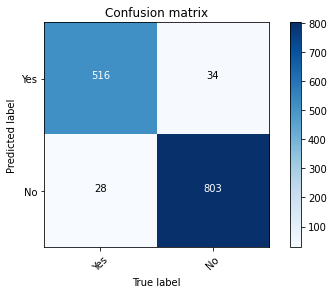

In [24]:
#Print confusion matrix
plot_confusion_matrix(metrics.confusion_matrix(pred_rf_best,y_test,labels=[1,0]),classes=['Yes','No'])

In [25]:
#Analyze classification report
print(metrics.classification_report(y_test,pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       837
           1       0.94      0.95      0.94       544

    accuracy                           0.96      1381
   macro avg       0.95      0.95      0.95      1381
weighted avg       0.96      0.96      0.96      1381



In [26]:
print("Accuracy Score on test dataset is: ",metrics.accuracy_score(y_test,pred_rf_best)*100)
print("AUC Score: ",metrics.roc_auc_score(y_test,pred_rf_best)*100)

Accuracy Score on test dataset is:  95.51049963794352
AUC Score:  95.39540726684939


After tuning Hyper-parameters, RF classifier has an **AUC Score of 95.4**. There isn't significant difference after tuning, as the original model is already predicting better.

## 4. Feature Importance

In [27]:
# Check which features are mostly important for classifying an email as spam or not after tuning hyper-parameters

feature_importances1 = pd.DataFrame(rf_best.feature_importances_,
                                   index = X_train_transformed_sca.columns,
                                   columns=['importance'])
feature_importances1 = feature_importances1.sort_values('importance',ascending=False)

feature_importances1

,importance
char_freq_!,0.086553
capital_run_length_average,0.072240
capital_run_length_longest,0.062755
char_freq_$,0.054124
word_freq_your,0.053958
word_freq_free,0.053258
word_freq_remove,0.052202
capital_run_length_total,0.048789
word_freq_hp,0.041014
word_freq_you,0.036115


<AxesSubplot:title={'center':'Feature Importance of Email Classification Dataset using RF after tuning'}>

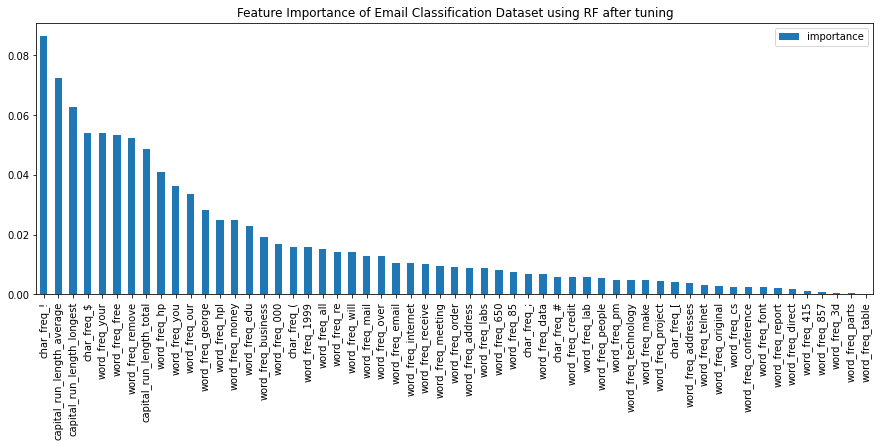

In [28]:
#Plot the feature importance graph.
feature_importances1.plot(kind = 'bar',figsize=(15,5),
                         title='Feature Importance of Email Classification Dataset using RF after tuning')

From the above bar graph we could see that, almost all the variables are important in classifying an Email as Spam or not except for the last 4 variables which have almost 0 importance value.

In [29]:
from sklearn.inspection import permutation_importance

perm_imp = permutation_importance(rf_best,X_test_transformed_sca,y_test)

<AxesSubplot:title={'center':'Permutation based Feature Importance of Email Classification Dataset using RF after tuning'}>

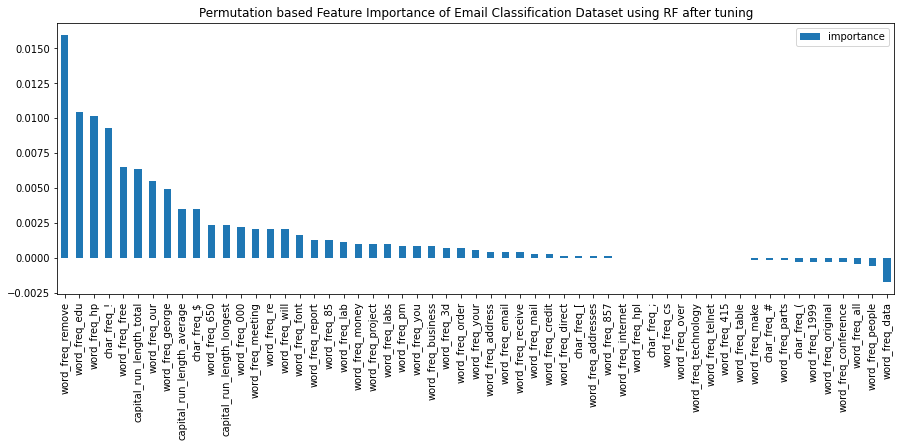

In [30]:
feature_importances_perm = pd.DataFrame(perm_imp.importances_mean,
                                   index = X_train_transformed_sca.columns,
                                   columns=['importance'])
feature_importances_perm = feature_importances_perm.sort_values('importance',ascending=False)

#Plot the feature importance graph.
feature_importances_perm.plot(kind = 'bar',figsize=(15,5),
                         title='Permutation based Feature Importance of Email Classification Dataset using RF after tuning')